### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

In [55]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [56]:
from skimage.color import rgb2gray
train_images=rgb2gray(train_images)
test_images=rgb2gray(test_images)

In [57]:
train_images.max()

1.0

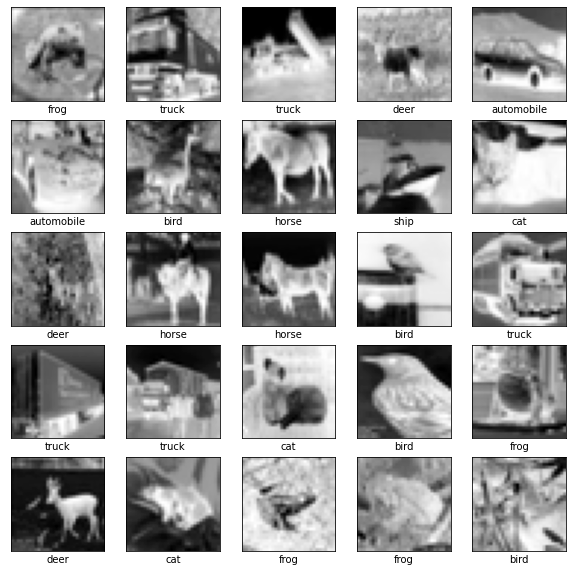

In [58]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [59]:
train_images.shape

(50000, 32, 32)

In [60]:
train_images_2 = train_images.reshape(50000, 32, 32, 1)
train_images_2.shape

(50000, 32, 32, 1)

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [61]:
model = keras.Sequential([
    keras.layers.Conv2D( filters=8, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                65568     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 65,978
Trainable params: 65,978
Non-trainable params: 0
__________________________________________________

### Entrenar el Modelo

In [64]:
model.fit(train_images_2, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8705 - accuracy: 0.3219
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5905 - accuracy: 0.4386
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5111 - accuracy: 0.4681
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4702 - accuracy: 0.4857
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4451 - accuracy: 0.4937
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4226 - accuracy: 0.5032
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4026 - accuracy: 0.5103
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3836 - accuracy: 0.5148
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3683 - accuracy: 0.5230
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.52 (52%) sobre el set de datos de entrenamiento.

### Evaluar Exactitud

In [29]:
test_images.shape

(10000, 32, 32)

In [30]:
test_images_2 = test_images.reshape(10000, 32, 32,1)
test_images_2.shape

(10000, 32, 32, 1)

In [31]:
test_loss, test_acc = model.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3989 - accuracy: 0.5095

Test accuracy: 0.5095000267028809


Los datos de evaluacion alcanzan una exactitud del 0.51%.Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.es decir, un resultado menor a los datos de entrenamiento, eso puede deberse a un overfiting

In [ ]:
2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [65]:
model_2 = keras.Sequential([
    keras.layers.Conv2D( filters=8, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [66]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                32784     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

### Entrenar el Modelo

In [68]:
model_2.fit(train_images_2, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9603 - accuracy: 0.2548
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7747 - accuracy: 0.3214
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7157 - accuracy: 0.3590
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6504 - accuracy: 0.3933
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6127 - accuracy: 0.4130
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5812 - accuracy: 0.4304
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5578 - accuracy: 0.4391
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5332 - accuracy: 0.4457
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5196 - accuracy: 0.4530
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.46 (o 46%) sobre el set de datos de entrenamiento.

### Evaluar Exactitud

In [69]:
test_images_2 = test_images.reshape(10000, 32, 32, 1)
test_images_2.shape

(10000, 32, 32, 1)

In [70]:
test_loss, test_acc = model_2.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.4639 - accuracy: 0.4692

Test accuracy: 0.4691999852657318


### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)



In [4]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_images_2 = train_images.reshape(50000, 32, 32, 3)
train_images_2.shape

(50000, 32, 32, 3)

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D( filters=8, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 66,122
Trainable params: 66,122
Non-trainable params: 0
__________________________________________________

### Entrenar el Modelo

In [16]:
model.fit(train_images_2, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6828 - accuracy: 0.3943
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3831 - accuracy: 0.5133
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3085 - accuracy: 0.5408
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2617 - accuracy: 0.5578
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2316 - accuracy: 0.5674
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2052 - accuracy: 0.5764
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1841 - accuracy: 0.5846
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1739 - accuracy: 0.5879
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1521 - accuracy: 0.5946
Epoch 10/10
1563/1563 [==============================] - 13s 9ms/step - l

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.60 (o 60%) sobre el set de datos de entrenamiento.

### Evaluar Exactitud

In [12]:
test_images.shape

(10000, 32, 32, 3)

In [13]:
test_images_2 = test_images.reshape(10000, 32, 32, 3)
test_images_2.shape

(10000, 32, 32, 3)

In [14]:
test_loss, test_acc = model.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.1911 - accuracy: 0.5856

Test accuracy: 0.5856000185012817


2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [15]:
model_2 = keras.Sequential([
    keras.layers.Conv2D( filters=8, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

### Entrenar el Modelo

In [18]:
model_2.fit(train_images_2, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8233 - accuracy: 0.3122
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6165 - accuracy: 0.4001
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5464 - accuracy: 0.4299
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4888 - accuracy: 0.4491
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4382 - accuracy: 0.4686
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4010 - accuracy: 0.4845
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3699 - accuracy: 0.4947
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3429 - accuracy: 0.5084
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3239 - accuracy: 0.5144
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.51 (51%) sobre el set de datos de entrenamiento.

### Evaluar Exactitud

In [19]:
test_loss, test_acc = model_2.evaluate(test_images_2,  test_labels, verbose=2)

313/313 - 1s - loss: 1.2750 - accuracy: 0.5359


Los datos de evaluacion alcanzan una exactitud del 0.54% es decir, un resultado mayor a los datos de entrenamiento

Ambos modelos no han dado buenos resultados, podrían realizarse algunos cambios, sin embargo este modelo no presenta sobreentrenamiento como ocurre en el modelo anterior. 